<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/MAT421SectionC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section C HW - MAT 421
Carson Streiff - Spring 2022

## 1. Root finder - Newton-Raphson method
This algorithm requires a guess, and an educated one at that in order to compute higher order roots without overflow. However, one strength of this program is that once given a reasonable enough guess, it can calculate the root to a very high accuracy. Here we compare the third root of five created by this function to the one calculated by numpy. The accuracy is impressive as we only gave it a starting guess of 1.6

In [ ]:
import numpy as np

def newton_raphson(f, df, x0, tol):

    if abs(f(x0)) < tol:
        return x0
    else:
        return newton_raphson(f, df, x0 - f(x0)/df(x0), tol)

#x and tol are strictly positive scalars, n is a positive integer strictly greater than 1
def my_nth_root(x,n,tol):
  f = lambda y: y**n - x
  df = lambda y: n*y
  x0 = 1.6

  ans = newton_raphson(f,df,x0,tol)


  return ans


print("Calculated root:       ", my_nth_root(5,3,0.00000000000001))
print("Numpy calculated root: ", np.power(5,1/3))


Calculated root:        1.709975946676696
Numpy calculated root:  1.7099759466766968


## 2. Bisection Method
This code takes a function as an argument, as well as two points a and b (for which f(a) and f(b) do not have the same signs) and completes the bisection method to find roots until the error is less than the tolerance. The outputs are two lists, one of the estimated root of each step, as well as the error of each step.

In [ ]:
def my_bisection(f,a,b,tol):

  #output arrays
  R = []
  E = []

  #exception if the signs are the same
  if np.sign(f(a)) == np.sign(f(b)):
    raise Exception("Boo!")
  
  m = (a + b) / 2
  


  if np.abs(f(m)) < tol:
    #append final value to array
    R.append(m)
    E.append(np.abs(f(m)))
    return [R,E]
  elif np.sign(f(m)) == np.sign(f(a)):
    R.append(m)
    E.append(np.abs(f(m)))

    temp = my_bisection(f,m,b,tol)
    tempR = temp[0]
    tempE = temp[1]


    for i in range (0,len(tempR),1):
      R.append(tempR[i])

    for i in range (0,len(tempE),1):
      E.append(tempE[i])

    return [R,E]

  elif np.sign(f(m)) == np.sign(f(b)):
    R.append(m)
    E.append(np.abs(f(m)))

    temp = my_bisection(f,a,m,tol)
    tempR = temp[0]
    tempE = temp[1]


    for i in range (0,len(tempR),1):
      R.append(tempR[i])

    for i in range (0,len(tempE),1):
      E.append(tempE[i])

    return [R,E]


f = lambda x: np.sin(x) - np.cos(x)
[R, E] = my_bisection(f, 0, 2, 1e-2)
print("R = ", [R,E][0])
print("E = ", [R,E][1])

R =  [1.0, 0.5, 0.75, 0.875, 0.8125, 0.78125]
E =  [0.30116867893975674, 0.39815702328616975, 0.050050108850486774, 0.126546644072702, 0.038323093040207756, 0.005866372111545948]


## 3. List of values from Newton-Raphson method
This code takes a function as its argument, the derivative of that function, the required tolerance of our answer, and an initial guess. It prints out each guess the algorithm makes as well as the error at that particular guess.

In [ ]:
def my_newton(f,df,x0,tol):

  R = []
  E = []
  
  if np.abs(f(x0)) < tol:
    R.append(x0)
    E.append(abs(f(x0)))
    return [R,E]
  else:
    R.append(x0)
    E.append(abs(f(x0)))

    temp = my_newton(f, df, x0 - f(x0)/df(x0), tol)
    
    tempR = temp[0]
    tempE = temp[1]


    for i in range (0,len(tempR),1):
      R.append(tempR[i])

    for i in range (0,len(tempE),1):
      E.append(tempE[i])

    return [R,E]

f = lambda x: np.sin(x) - np.cos(x)
df = lambda x: np.cos(x) + np.sin(x)
[R, E] = my_newton(f, df, 1, 1e-5)



print("R = ", [R,E][0])
print("E = ", [R,E][1])

R =  [1, 1.5, 1.25, 1.375, 1.4375]
E =  [1, 0.25, 0.4375, 0.109375, 0.06640625]


## 4. Pipe Builder
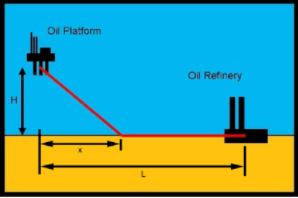

This code calculates how far along the shore to build a junction between a land pipe and an ocean pipe given the relative distances from each other and the costs of each type of pipe. Using the pythagorean theorem, we can express the total cost of the project (as defined by the distance x denoted in the picture) as f(x) = (L - x) * C_land + C_ocean * (x^2 + H^2)^(1/2)

Inspecting this function shows that it is parabolic, with a minimum above the x axis. In order to find this minimum using the bisection method, we simply analyze the derivative of the parabola and find where the derivative is equal to zero. The following code shows how this operation can be done using a simple bisection function.

In [ ]:
def bisection(f, a, b, tol): 

    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "Boo!")
        
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        return bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        return bisection(f, a, m, tol)


def my_pipe_builder(C_ocean,C_land,L,H):

  #define the derivative function we will find the roots for
  df = lambda x: -C_land + C_ocean * ( (x) / np.sqrt(x**2 + H**2) )

  return bisection(df,0,L,1e-6)

C_ocean = 30
C_land = 10
L = 100
H = 50


print("Build pipe at x =" , my_pipe_builder(C_ocean, C_land, L, H))

Build pipe at x = 17.67767071723938
